In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

import prep

In [2]:
zillow = prep.acquire_and_prep_data()
zillow

,id,bathroomcnt,bedroomcnt,squarefeet,taxvaluedollarcnt,taxamount,taxrate,FIPS,County,State
0,2061546,2.0,3,1458.0,136104.0,2319.90,1.70,6037,Los Angeles,CA
1,1834372,1.0,2,1421.0,35606.0,543.69,1.53,6037,Los Angeles,CA
2,2121349,2.0,3,1650.0,614000.0,7673.19,1.25,6037,Los Angeles,CA
3,2093710,1.0,2,693.0,274237.0,3267.47,1.19,6037,Los Angeles,CA
4,496818,0.0,0,1378.0,168828.0,2135.39,1.26,6037,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...
20343,1624472,3.0,3,2632.0,795992.0,8449.92,1.06,6111,Ventura,CA
20344,997928,3.0,4,2734.0,897000.0,9585.08,1.07,6111,Ventura,CA
20345,849307,2.5,4,2314.0,485364.0,9549.08,1.97,6111,Ventura,CA
20346,2416171,2.0,2,1178.0,169908.0,1779.86,1.05,6111,Ventura,CA


## So first off lets, the zillow team wanted a viz of the distribution of tax rates by county

(array([1.823e+03, 3.947e+03, 3.400e+01, 5.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000e-02, 1.083e+00, 2.156e+00, 3.229e+00, 4.302e+00, 5.375e+00,
        6.448e+00, 7.521e+00, 8.594e+00, 9.667e+00, 1.074e+01]),
 <a list of 10 Patch objects>)

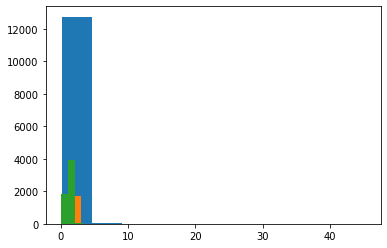

In [3]:
plt.hist(zillow.taxrate[zillow.County == 'Los Angeles'])
plt.hist(zillow.taxrate[zillow.County == 'Ventura'])
plt.hist(zillow.taxrate[zillow.County == 'Orange'])

### So we can see that their are some outliers so lets lose those and see what happens

In [4]:
zillow_tax = zillow[zillow.taxrate < 3]
zillow_tax

,id,bathroomcnt,bedroomcnt,squarefeet,taxvaluedollarcnt,taxamount,taxrate,FIPS,County,State
0,2061546,2.0,3,1458.0,136104.0,2319.90,1.70,6037,Los Angeles,CA
1,1834372,1.0,2,1421.0,35606.0,543.69,1.53,6037,Los Angeles,CA
2,2121349,2.0,3,1650.0,614000.0,7673.19,1.25,6037,Los Angeles,CA
3,2093710,1.0,2,693.0,274237.0,3267.47,1.19,6037,Los Angeles,CA
4,496818,0.0,0,1378.0,168828.0,2135.39,1.26,6037,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...
20343,1624472,3.0,3,2632.0,795992.0,8449.92,1.06,6111,Ventura,CA
20344,997928,3.0,4,2734.0,897000.0,9585.08,1.07,6111,Ventura,CA
20345,849307,2.5,4,2314.0,485364.0,9549.08,1.97,6111,Ventura,CA
20346,2416171,2.0,2,1178.0,169908.0,1779.86,1.05,6111,Ventura,CA


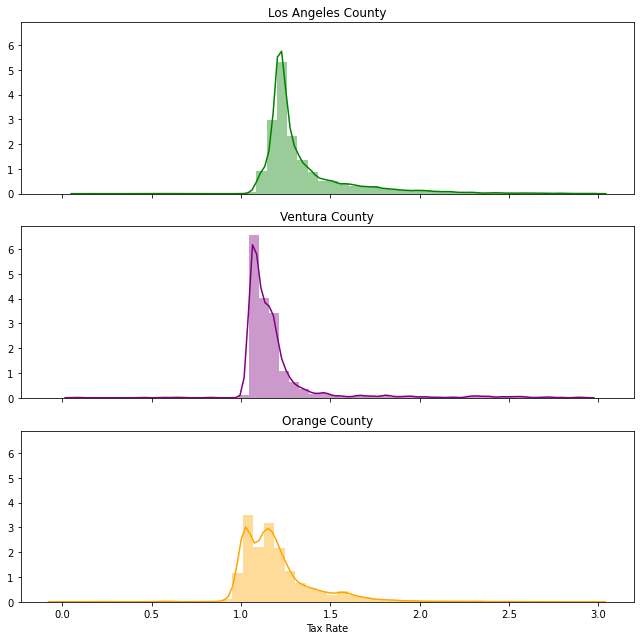

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(9, 9), sharex=True, sharey=True)

sns.distplot(zillow_tax.taxrate[zillow_tax.County == 'Los Angeles'], ax=axs[0], color='green')
axs[0].set_title('Los Angeles County')
axs[0].set_xlabel('')
sns.distplot(zillow_tax.taxrate[zillow_tax.County == 'Ventura'], ax=axs[1], color='purple')
axs[1].set_title('Ventura County')
axs[1].set_xlabel('')
sns.distplot(zillow_tax.taxrate[zillow_tax.County == 'Orange'], ax=axs[2], color='orange')
axs[2].set_title('Orange County')
axs[2].set_xlabel('Tax Rate')
plt.tight_layout()

## Now that we have made that graph for the team lets split our data and get to some exploration

In [6]:
zillow = zillow[['bathroomcnt', 'bedroomcnt', 'squarefeet', 'taxvaluedollarcnt']]
zillow

,bathroomcnt,bedroomcnt,squarefeet,taxvaluedollarcnt
0,2.0,3,1458.0,136104.0
1,1.0,2,1421.0,35606.0
2,2.0,3,1650.0,614000.0
3,1.0,2,693.0,274237.0
4,0.0,0,1378.0,168828.0
...,...,...,...,...
20343,3.0,3,2632.0,795992.0
20344,3.0,4,2734.0,897000.0
20345,2.5,4,2314.0,485364.0
20346,2.0,2,1178.0,169908.0


In [7]:
train, test = train_test_split(zillow)
train.shape[0], test.shape[0]

(15220, 5074)

## Great now lets look at the relationships between these features

### Let's start with a pairplot

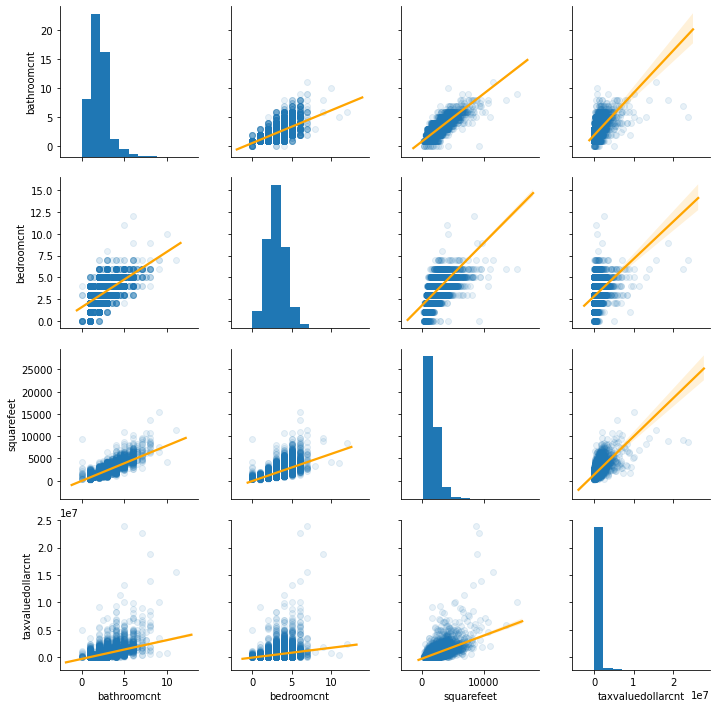

In [8]:
sns.pairplot(zillow, kind='reg', plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'alpha': 0.1}})

### Takeaways from the pairplot

* All the features have a pretty tight relationship so this would need to be addressed
* They seem pretty equally matched on the linear regression against taxvaluedollarcnt

### Lets take a look at the correlations

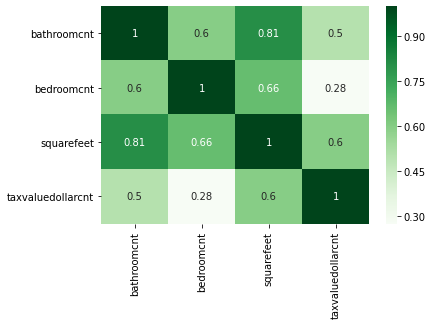

In [12]:
sns.heatmap(zillow.corr(), annot=True, cmap='Greens')

#### Takeaways
* Here it looks like bedroom count will probably perform the worst
* Square feet will probably perform the best
* Bathrooms will probably perform the second best